# LIBRARY

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

# Dataset

In [151]:
dt = pd.read_csv('final_dataset.csv')

In [152]:
df = dt.copy()
df.to_csv('final_dataset.csv')
df = df.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.3    331 non-null    int64  
 1   area_name       331 non-null    object 
 2   property_id     331 non-null    object 
 3   property_name   331 non-null    object 
 4   property_type   331 non-null    object 
 5   unit_id         331 non-null    object 
 6   unit_name       331 non-null    object 
 7   unit_type       331 non-null    object 
 8   bedroom         331 non-null    float64
 9   bathroom        331 non-null    float64
 10  beds            331 non-null    float64
 11  wifi            331 non-null    float64
 12  tv              331 non-null    float64
 13  ac              331 non-null    float64
 14  parking         331 non-null    float64
 15  pool            331 non-null    float64
 16  breakfast       331 non-null    float64
 17  building_staff  331 non-null    flo

# EDA & Preprocessing

In [153]:
area_name = df['area_name']
property_type = df['property_type']
unit = df['unit_type']

In [155]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['area_name'] = label_encoder.fit_transform(df['area_name'])
# df['unit_id'] = df['unit_id'].str[2:].astype(int)
df['property_type'] = label_encoder.fit_transform(df['property_type'])
df['property_name'] = label_encoder.fit_transform(df['property_name'])
df['unit_type'] = label_encoder.fit_transform(df['unit_type'])
df = df.drop(columns=['Unnamed: 0.3'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_name       331 non-null    int64  
 1   property_id     331 non-null    object 
 2   property_name   331 non-null    int64  
 3   property_type   331 non-null    int64  
 4   unit_id         331 non-null    object 
 5   unit_name       331 non-null    object 
 6   unit_type       331 non-null    int64  
 7   bedroom         331 non-null    float64
 8   bathroom        331 non-null    float64
 9   beds            331 non-null    float64
 10  wifi            331 non-null    float64
 11  tv              331 non-null    float64
 12  ac              331 non-null    float64
 13  parking         331 non-null    float64
 14  pool            331 non-null    float64
 15  breakfast       331 non-null    float64
 16  building_staff  331 non-null    float64
 17  price_per_unit  331 non-null    flo

area_name property_id  property_name  property_type unit_id  \
0           14      PR0837             37              0  UN3085   
1            7      PR0791             57              0  UN3014   
2            7      PR0791             57              0  UN3009   
3           19      PR0809             53              0  UN3051   
4            1      PR0650             51              0  UN2693   
..         ...         ...            ...            ...     ...   
326         10      PR0554             87              3  UN2742   
327         10      PR0554             87              3  UN2740   
328         10      PR0554             87              3  UN3035   
329          0      PR0088             93              4  UN3040   
330          6      PR0778             72              4  UN2966   

             unit_name  unit_type  bedroom  bathroom  beds  wifi   tv   ac  \
0                 Mimo          2      1.0       1.0   1.0   1.0  1.0  1.0   
1               Room 4         70      1.0       1.0   1.0   1.0  1.0  1.0   
2              Room 12         54      1.0       1.0   1.0   1.0  1.0  1.0   
3    Standard - Room 1         74      1.0       1.0   1.0   1.0  1.0  1.0   
4                    1         46      1.0       1.0   1.0   0.0  1.0  0.0   
..                 ...        ...      ...       ...   ...   ...  ...  ...   
326             Room 9         63      1.0       1.0   1.0   1.0  0.0  1.0   
327             Room 7         63      1.0       1.0   1.0   1.0  0.0  1.0   
328             Room 4         76      1.0       1.0   1.0   1.0  0.0  1.0   
329             Room 2        103      1.0       1.0   1.0   1.0  0.0  1.0   
330       Entire Villa         93      2.0       2.0   2.0   1.0  0.0  1.0   

     parking  pool  breakfast  building_staff  price_per_unit  total_bookings  \
0        1.0   1.0        0.0             1.0   681100.606557            18.0   
1        1.0   1.0        0.0             1.0   510088.308000            36.0   
2        1.0   1.0        0.0             1.0   753316.335052            30.0   
3        1.0   1.0        0.0             1.0   763066.500000            39.0   
4        1.0   0.0        0.0             0.0   377354.364251            50.0   
..       ...   ...        ...             ...             ...             ...   
326      1.0   0.0        0.0             0.0   585261.670938            92.0   
327      1.0   0.0        0.0             0.0   798408.018258           168.0   
328      1.0   0.0        0.0             0.0   927270.298077            54.0   
329      0.0   0.0        0.0             0.0   744056.045161            43.0   
330      1.0   0.0        0.0             0.0   894656.811715            59.0   

     overall_rating  
0          4.968254  
1          4.955357  
2          4.946429  
3          4.937500  
4          4.935065  
..              ...  
326        4.305419  
327        4.252492  
328        3.619048  
329        4.571429  
330        4.297143  

[331 rows x 20 columns]

In [156]:
df = df[['area_name', 'property_id','property_name', 'property_type', 'unit_type', 'bedroom',
       'bathroom', 'beds', 'wifi', 'tv', 'ac',
       'parking', 'pool', 'breakfast','building_staff',
       'price_per_unit', 'total_bookings','overall_rating']]
df.head()

area_name property_id  property_name  property_type  unit_type  bedroom  \
0         14      PR0837             37              0          2      1.0   
1          7      PR0791             57              0         70      1.0   
2          7      PR0791             57              0         54      1.0   
3         19      PR0809             53              0         74      1.0   
4          1      PR0650             51              0         46      1.0   

   bathroom  beds  wifi   tv   ac  parking  pool  breakfast  building_staff  \
0       1.0   1.0   1.0  1.0  1.0      1.0   1.0        0.0             1.0   
1       1.0   1.0   1.0  1.0  1.0      1.0   1.0        0.0             1.0   
2       1.0   1.0   1.0  1.0  1.0      1.0   1.0        0.0             1.0   
3       1.0   1.0   1.0  1.0  1.0      1.0   1.0        0.0             1.0   
4       1.0   1.0   0.0  1.0  0.0      1.0   0.0        0.0             0.0   

   price_per_unit  total_bookings  overall_rating  
0   681100.606557            18.0        4.968254  
1   510088.308000            36.0        4.955357  
2   753316.335052            30.0        4.946429  
3   763066.500000            39.0        4.937500  
4   377354.364251            50.0        4.935065

In [157]:
df.describe()

area_name  property_name  property_type   unit_type     bedroom  \
count  331.000000     331.000000     331.000000  331.000000  331.000000   
mean     9.293051      40.441088       1.135952   52.803625    1.283988   
std      7.545132      29.568288       1.692123   28.119347    0.733000   
min      0.000000       0.000000       0.000000    0.000000    1.000000   
25%      1.000000      12.000000       0.000000   31.500000    1.000000   
50%      9.000000      37.000000       0.000000   55.000000    1.000000   
75%     19.000000      61.000000       3.000000   74.000000    1.000000   
max     21.000000      97.000000       4.000000  107.000000    5.000000   

         bathroom        beds        wifi          tv          ac     parking  \
count  331.000000  331.000000  331.000000  331.000000  331.000000  331.000000   
mean     1.317221    1.314199    0.981873    0.465257    0.945619    0.927492   
std      0.855803    0.757434    0.133612    0.499547    0.227111    0.259719   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    1.000000    0.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    0.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      5.000000    5.000000    1.000000    1.000000    1.000000    1.000000   

             pool   breakfast  building_staff  price_per_unit  total_bookings  \
count  331.000000  331.000000      331.000000    3.310000e+02      331.000000   
mean     0.691843    0.175227        0.468278    9.000158e+05       97.915408   
std      0.462431    0.380736        0.499748    6.915879e+05       57.926119   
min      0.000000    0.000000        0.000000    2.642067e+05        3.000000   
25%      0.000000    0.000000        0.000000    5.013948e+05       51.000000   
50%      1.000000    0.000000        0.000000    6.809707e+05       93.000000   
75%      1.000000    0.000000        1.000000    1.055762e+06      140.500000   
max      1.000000    1.000000        1.000000    6.143933e+06      338.000000   

       overall_rating  
count      331.000000  
mean         4.643519  
std          0.211709  
min          3.571429  
25%          4.527056  
50%          4.670330  
75%          4.792980  
max          5.000000

0 : 'Guesthouse',
4 : 'Villa',
1 : 'Hostel',
3 : 'Resort',
2 : 'House'

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_name       331 non-null    int64  
 1   property_id     331 non-null    object 
 2   property_name   331 non-null    int64  
 3   property_type   331 non-null    int64  
 4   unit_type       331 non-null    int64  
 5   bedroom         331 non-null    float64
 6   bathroom        331 non-null    float64
 7   beds            331 non-null    float64
 8   wifi            331 non-null    float64
 9   tv              331 non-null    float64
 10  ac              331 non-null    float64
 11  parking         331 non-null    float64
 12  pool            331 non-null    float64
 13  breakfast       331 non-null    float64
 14  building_staff  331 non-null    float64
 15  price_per_unit  331 non-null    float64
 16  total_bookings  331 non-null    float64
 17  overall_rating  331 non-null    flo

In [159]:
df

area_name property_id  property_name  property_type  unit_type  bedroom  \
0           14      PR0837             37              0          2      1.0   
1            7      PR0791             57              0         70      1.0   
2            7      PR0791             57              0         54      1.0   
3           19      PR0809             53              0         74      1.0   
4            1      PR0650             51              0         46      1.0   
..         ...         ...            ...            ...        ...      ...   
326         10      PR0554             87              3         63      1.0   
327         10      PR0554             87              3         63      1.0   
328         10      PR0554             87              3         76      1.0   
329          0      PR0088             93              4        103      1.0   
330          6      PR0778             72              4         93      2.0   

     bathroom  beds  wifi   tv   ac  parking  pool  breakfast  building_staff  \
0         1.0   1.0   1.0  1.0  1.0      1.0   1.0        0.0             1.0   
1         1.0   1.0   1.0  1.0  1.0      1.0   1.0        0.0             1.0   
2         1.0   1.0   1.0  1.0  1.0      1.0   1.0        0.0             1.0   
3         1.0   1.0   1.0  1.0  1.0      1.0   1.0        0.0             1.0   
4         1.0   1.0   0.0  1.0  0.0      1.0   0.0        0.0             0.0   
..        ...   ...   ...  ...  ...      ...   ...        ...             ...   
326       1.0   1.0   1.0  0.0  1.0      1.0   0.0        0.0             0.0   
327       1.0   1.0   1.0  0.0  1.0      1.0   0.0        0.0             0.0   
328       1.0   1.0   1.0  0.0  1.0      1.0   0.0        0.0             0.0   
329       1.0   1.0   1.0  0.0  1.0      0.0   0.0        0.0             0.0   
330       2.0   2.0   1.0  0.0  1.0      1.0   0.0        0.0             0.0   

     price_per_unit  total_bookings  overall_rating  
0     681100.606557            18.0        4.968254  
1     510088.308000            36.0        4.955357  
2     753316.335052            30.0        4.946429  
3     763066.500000            39.0        4.937500  
4     377354.364251            50.0        4.935065  
..              ...             ...             ...  
326   585261.670938            92.0        4.305419  
327   798408.018258           168.0        4.252492  
328   927270.298077            54.0        3.619048  
329   744056.045161            43.0        4.571429  
330   894656.811715            59.0        4.297143  

[331 rows x 18 columns]

### Scalling data

In [160]:
from sklearn.preprocessing import StandardScaler
df2 = df.drop(columns=['property_name', 'property_id', 'total_bookings', 'unit_type'])
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_name       331 non-null    int64  
 1   property_type   331 non-null    int64  
 2   bedroom         331 non-null    float64
 3   bathroom        331 non-null    float64
 4   beds            331 non-null    float64
 5   wifi            331 non-null    float64
 6   tv              331 non-null    float64
 7   ac              331 non-null    float64
 8   parking         331 non-null    float64
 9   pool            331 non-null    float64
 10  breakfast       331 non-null    float64
 11  building_staff  331 non-null    float64
 12  price_per_unit  331 non-null    float64
 13  overall_rating  331 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 36.3 KB


area_name  property_type  bedroom  bathroom  beds  wifi   tv   ac  \
0           14              0      1.0       1.0   1.0   1.0  1.0  1.0   
1            7              0      1.0       1.0   1.0   1.0  1.0  1.0   
2            7              0      1.0       1.0   1.0   1.0  1.0  1.0   
3           19              0      1.0       1.0   1.0   1.0  1.0  1.0   
4            1              0      1.0       1.0   1.0   0.0  1.0  0.0   
..         ...            ...      ...       ...   ...   ...  ...  ...   
326         10              3      1.0       1.0   1.0   1.0  0.0  1.0   
327         10              3      1.0       1.0   1.0   1.0  0.0  1.0   
328         10              3      1.0       1.0   1.0   1.0  0.0  1.0   
329          0              4      1.0       1.0   1.0   1.0  0.0  1.0   
330          6              4      2.0       2.0   2.0   1.0  0.0  1.0   

     parking  pool  breakfast  building_staff  price_per_unit  overall_rating  
0        1.0   1.0        0.0             1.0   681100.606557        4.968254  
1        1.0   1.0        0.0             1.0   510088.308000        4.955357  
2        1.0   1.0        0.0             1.0   753316.335052        4.946429  
3        1.0   1.0        0.0             1.0   763066.500000        4.937500  
4        1.0   0.0        0.0             0.0   377354.364251        4.935065  
..       ...   ...        ...             ...             ...             ...  
326      1.0   0.0        0.0             0.0   585261.670938        4.305419  
327      1.0   0.0        0.0             0.0   798408.018258        4.252492  
328      1.0   0.0        0.0             0.0   927270.298077        3.619048  
329      0.0   0.0        0.0             0.0   744056.045161        4.571429  
330      1.0   0.0        0.0             0.0   894656.811715        4.297143  

[331 rows x 14 columns]

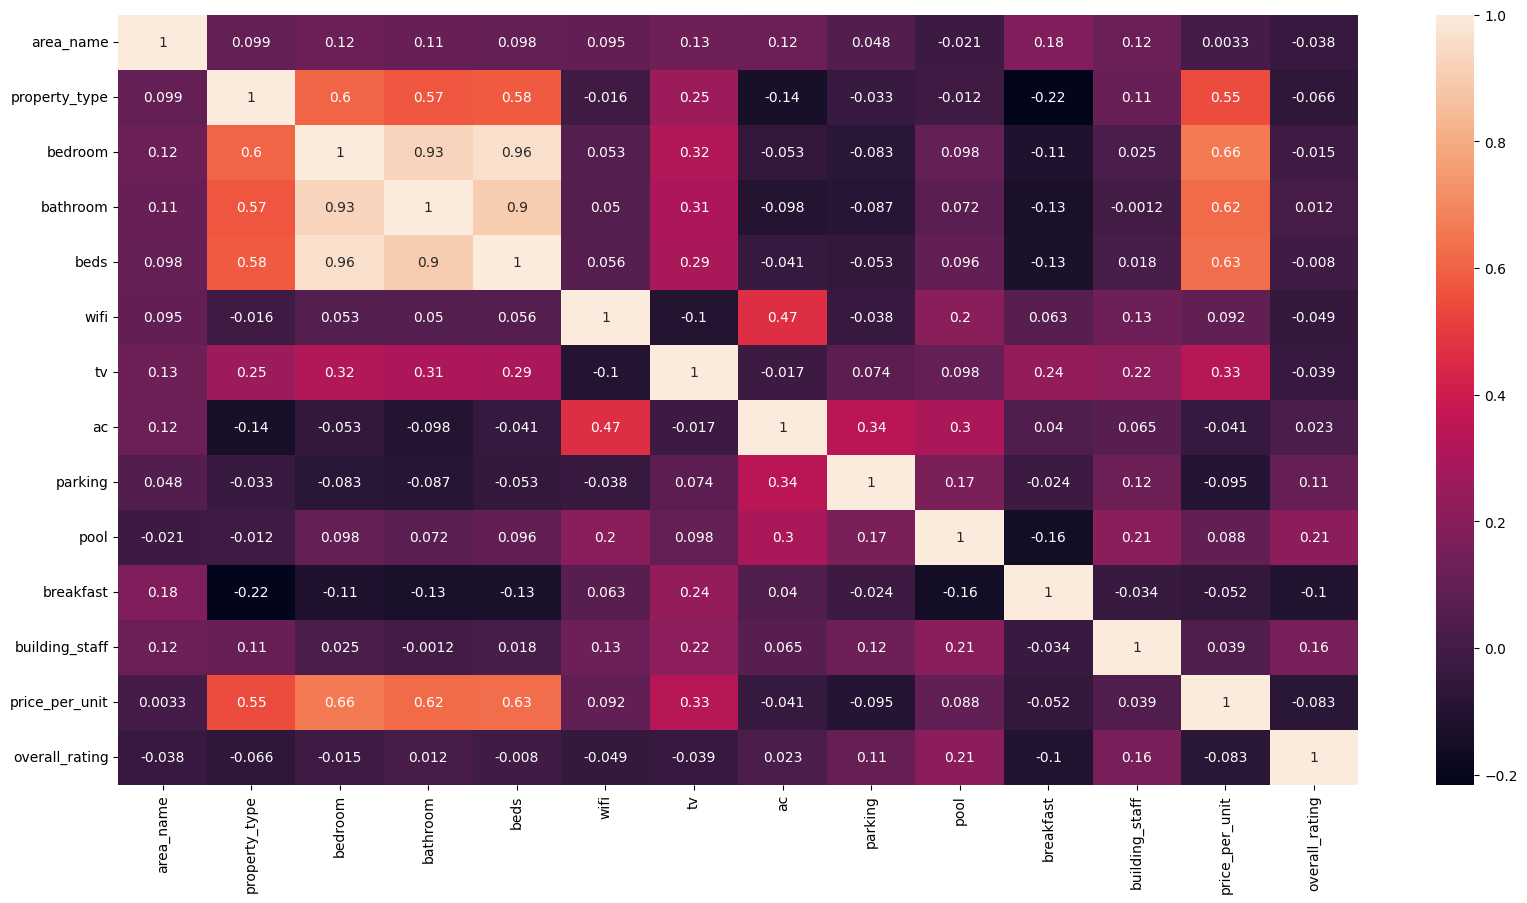

In [161]:
plt.figure(figsize = (20,10))
sns.heatmap(df2.corr(),annot = True)
plt.show()

In [162]:
standard_scaler = StandardScaler()
df2_scaled = standard_scaler.fit_transform(df2)

# PCA

In [163]:
from sklearn.decomposition import PCA

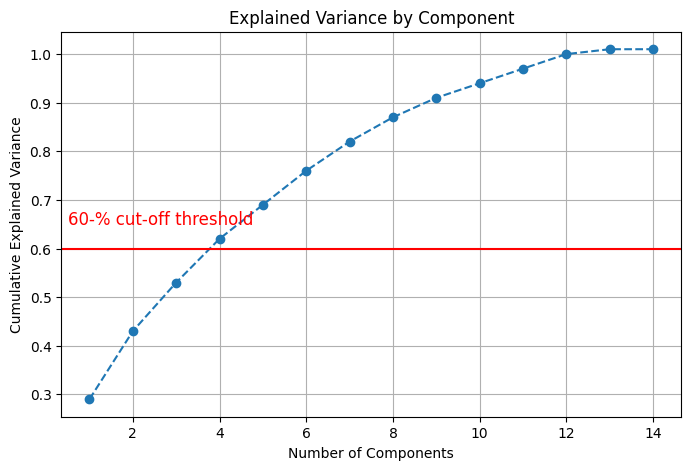

Number of components explaining 80% of the variance: 4


In [164]:
pca = PCA().fit(df2_scaled)

# Explained Variance Ratio
explained_variance_ratio = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 2))

# Plot Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Component')
plt.axhline(y=0.60, color='r', linestyle='-')
plt.text(0.5, 0.65, '60-% cut-off threshold', color='red', fontsize=12)
plt.grid(True)
plt.show()

# Menentukan jumlah komponen yang menjelaskan setidaknya 95% dari varians
n_components = np.argmax(explained_variance_ratio >= 0.6) + 1
print(f'Number of components explaining 80% of the variance: {n_components}')

In [165]:
pca = PCA(n_components = 5)
scores_pca = pca.fit_transform(df2_scaled)

In [166]:
colnames = list(df2.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4]})#, 'PC6':pca.components_[5], 'PC7':pca.components_[6]}) #,'PC7':pca.components_[6], 'PC8':pca.components_[7], 'PC9':pca.components_[8]})
pcs_df

Feature       PC1       PC2       PC3       PC4       PC5
0        area_name  0.066949 -0.160192  0.436964  0.083605  0.089758
1    property_type  0.366423  0.063540 -0.061186  0.050215 -0.015772
2          bedroom  0.474476  0.002657 -0.016543 -0.065461 -0.043717
3         bathroom  0.459241  0.026441 -0.035872 -0.058813 -0.035548
4             beds  0.463592 -0.004432 -0.036792 -0.072866 -0.069962
5             wifi  0.027441 -0.413091  0.135973 -0.522438  0.338559
6               tv  0.213011 -0.085277  0.350601  0.460113 -0.045863
7               ac -0.044886 -0.558271  0.097368 -0.295367 -0.246280
8          parking -0.044305 -0.361631 -0.051074  0.264835 -0.714204
9             pool  0.057133 -0.461431 -0.269617  0.061192  0.105592
10       breakfast -0.071769 -0.002786  0.653596  0.106123  0.037129
11  building_staff  0.044648 -0.315805 -0.001502  0.434214  0.486819
12  price_per_unit  0.386648  0.003863  0.036255 -0.068506  0.014613
13  overall_rating -0.017174 -0.191158 -0.384328  0.356607  0.215462

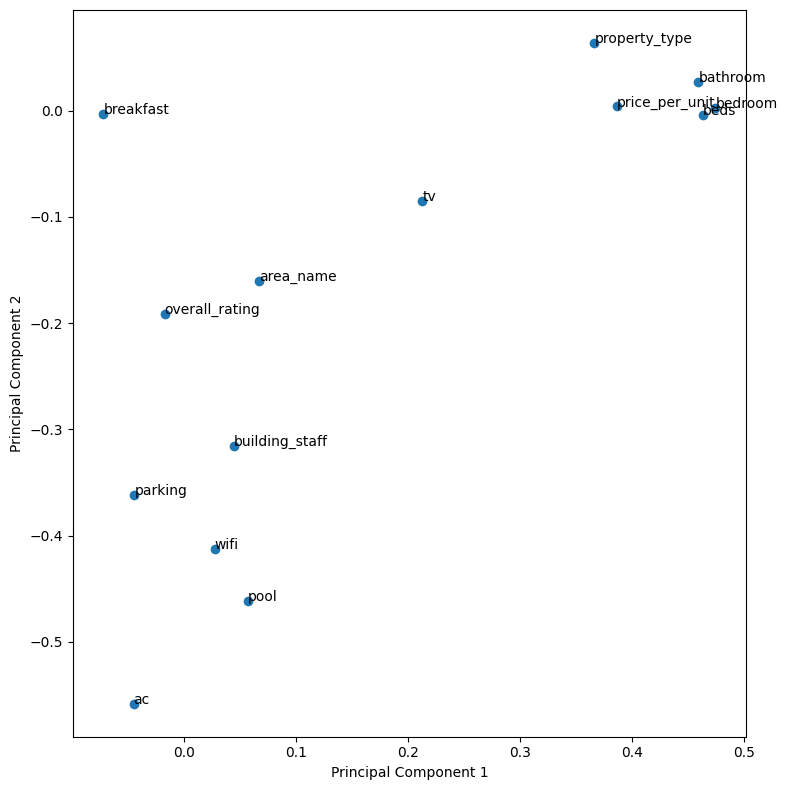

In [167]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

### Analyzing PCA Loading

In [168]:
df3 = df2.copy()

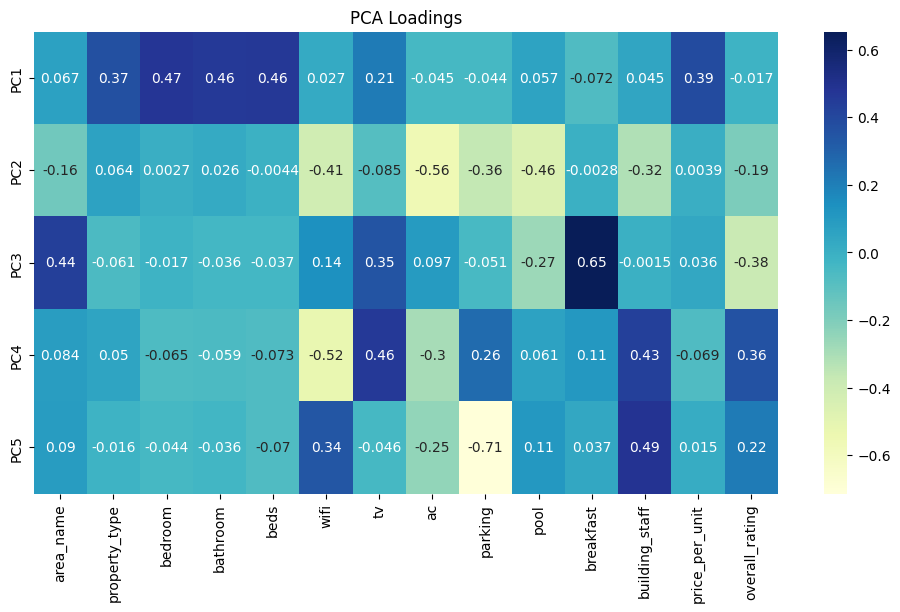

In [169]:
pca_components = pca.components_
pca_loadings_df = pd.DataFrame(pca_components, columns=df3.columns, index=[f'PC{i+1}' for i in range(5)])

# Display the loadings
pca_loadings_df

# Heatmap of the loadings
plt.figure(figsize=(12, 6))
sns.heatmap(pca_loadings_df, cmap="YlGnBu", annot=True)
plt.title('PCA Loadings')
plt.show()

In [170]:
# Extract the absolute values of the PCA loadings
pca_loadings_analysis = pd.DataFrame(
    np.abs(pca.components_),
    columns=df3.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components)]
)

# Identify the top contributing features for each principal component
top_features_per_pc7 = pca_loadings_analysis.apply(lambda s: s.nlargest(14).index.tolist(), axis=1)

# Display the top contributing features for each principal component
pd.DataFrame(top_features_per_pc7)

0
PC1  [bedroom, beds, bathroom, price_per_unit, prop...
PC2  [ac, pool, wifi, parking, building_staff, over...
PC3  [breakfast, area_name, overall_rating, tv, poo...
PC4  [wifi, tv, building_staff, overall_rating, ac,...
PC5  [parking, building_staff, wifi, ac, overall_ra...

# Hierarchical

In [171]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [172]:
pcs_df

Feature       PC1       PC2       PC3       PC4       PC5
0        area_name  0.066949 -0.160192  0.436964  0.083605  0.089758
1    property_type  0.366423  0.063540 -0.061186  0.050215 -0.015772
2          bedroom  0.474476  0.002657 -0.016543 -0.065461 -0.043717
3         bathroom  0.459241  0.026441 -0.035872 -0.058813 -0.035548
4             beds  0.463592 -0.004432 -0.036792 -0.072866 -0.069962
5             wifi  0.027441 -0.413091  0.135973 -0.522438  0.338559
6               tv  0.213011 -0.085277  0.350601  0.460113 -0.045863
7               ac -0.044886 -0.558271  0.097368 -0.295367 -0.246280
8          parking -0.044305 -0.361631 -0.051074  0.264835 -0.714204
9             pool  0.057133 -0.461431 -0.269617  0.061192  0.105592
10       breakfast -0.071769 -0.002786  0.653596  0.106123  0.037129
11  building_staff  0.044648 -0.315805 -0.001502  0.434214  0.486819
12  price_per_unit  0.386648  0.003863  0.036255 -0.068506  0.014613
13  overall_rating -0.017174 -0.191158 -0.384328  0.356607  0.215462

## Linkage

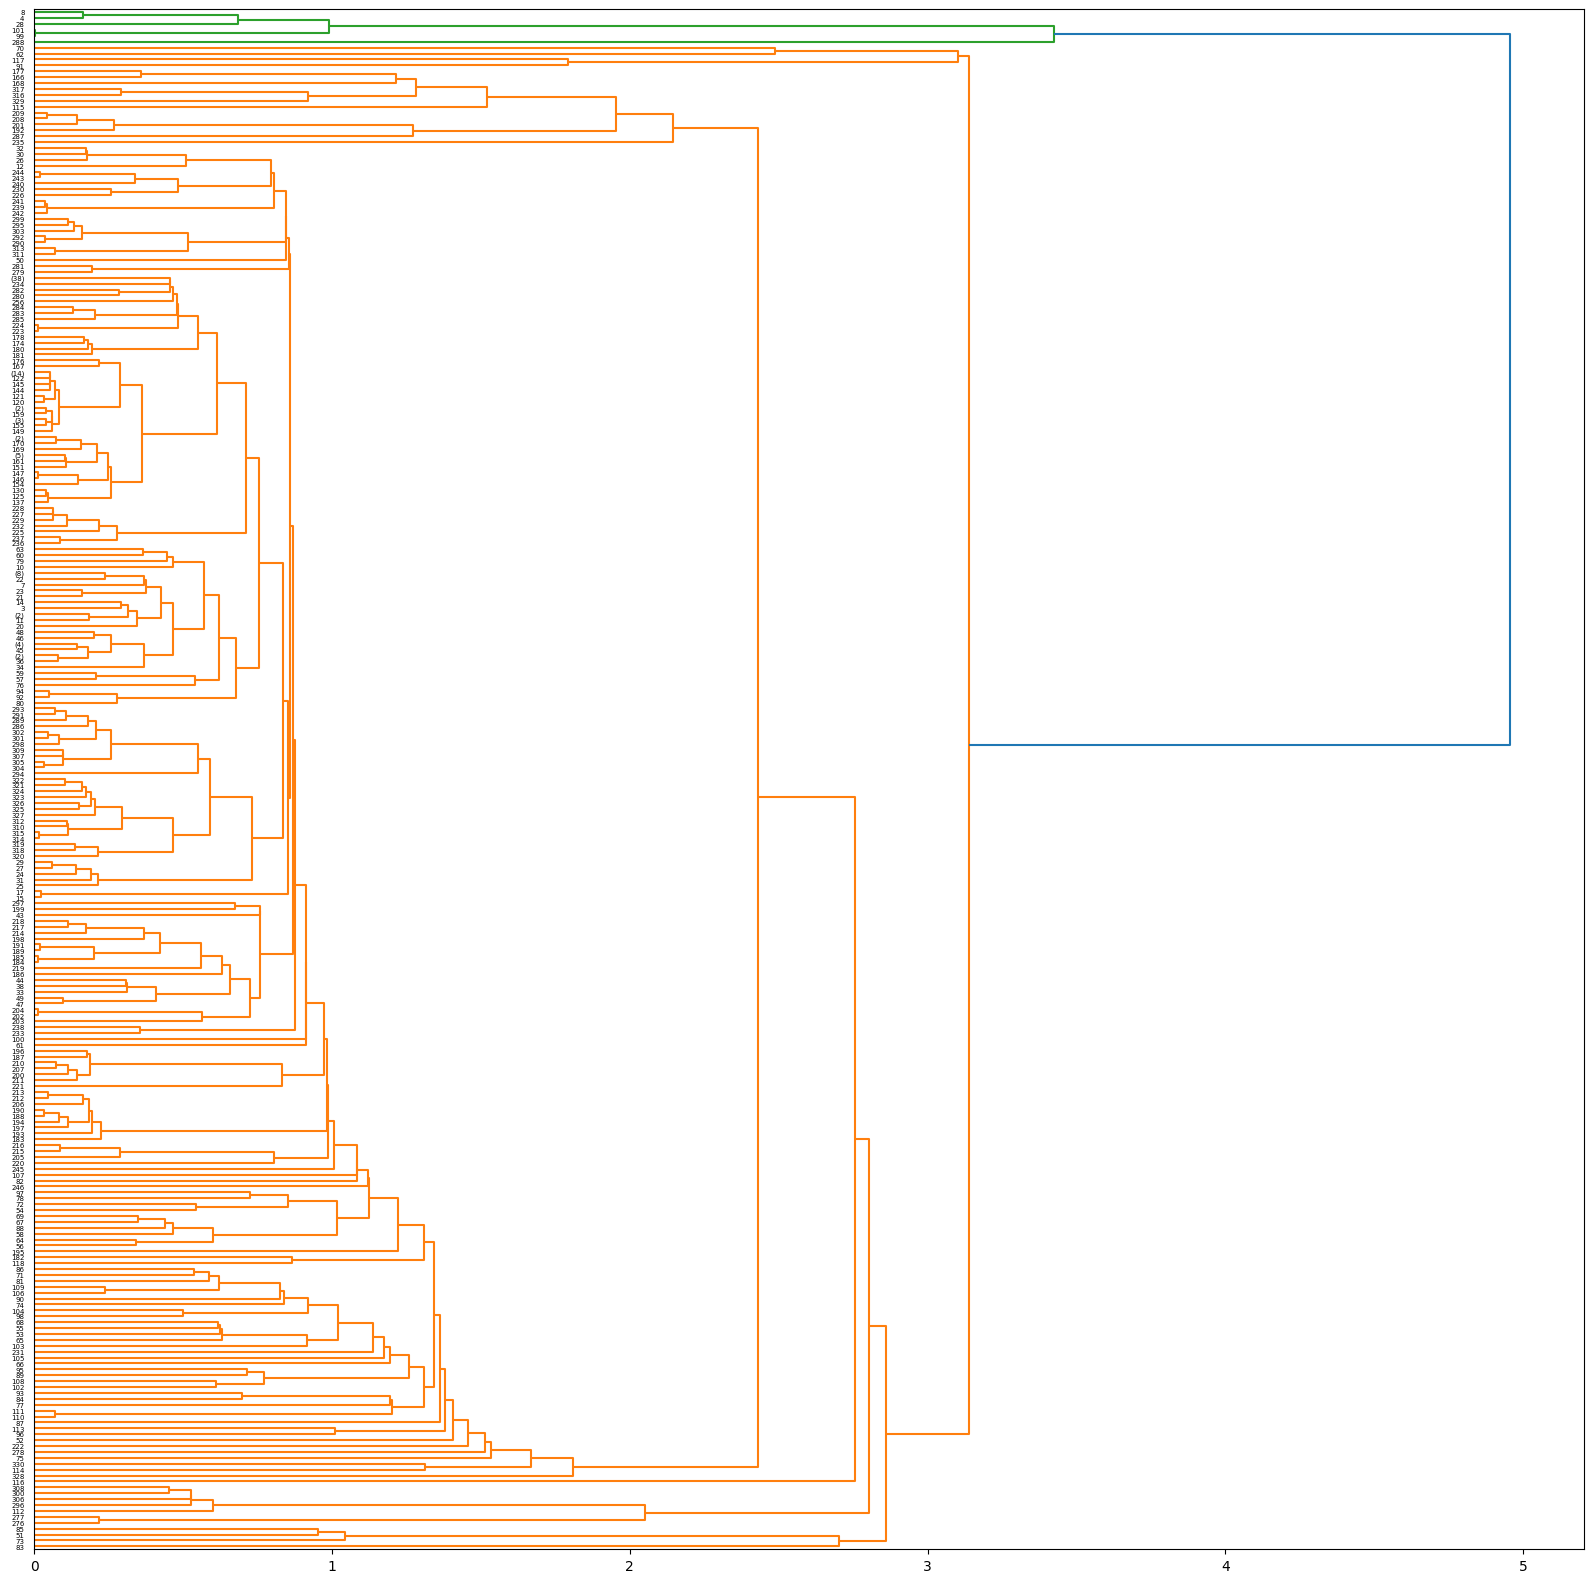

In [173]:
# Membuat dendrogram dengan pendekatan single linkage
cl_mergings_single = linkage(scores_pca, method='single', metric='euclidean')

# Menggambar dendrogram
plt.figure(figsize=(20, 20))  # Ukuran gambar disesuaikan dengan kebutuhan
dendrogram(cl_mergings_single, orientation='right', truncate_mode='level', p=40)

# Menampilkan plot
plt.show()

In [244]:
scores_pca_cleaned = np.delete(scores_pca, (248, 73, 83, 70, 283,62), axis=0)

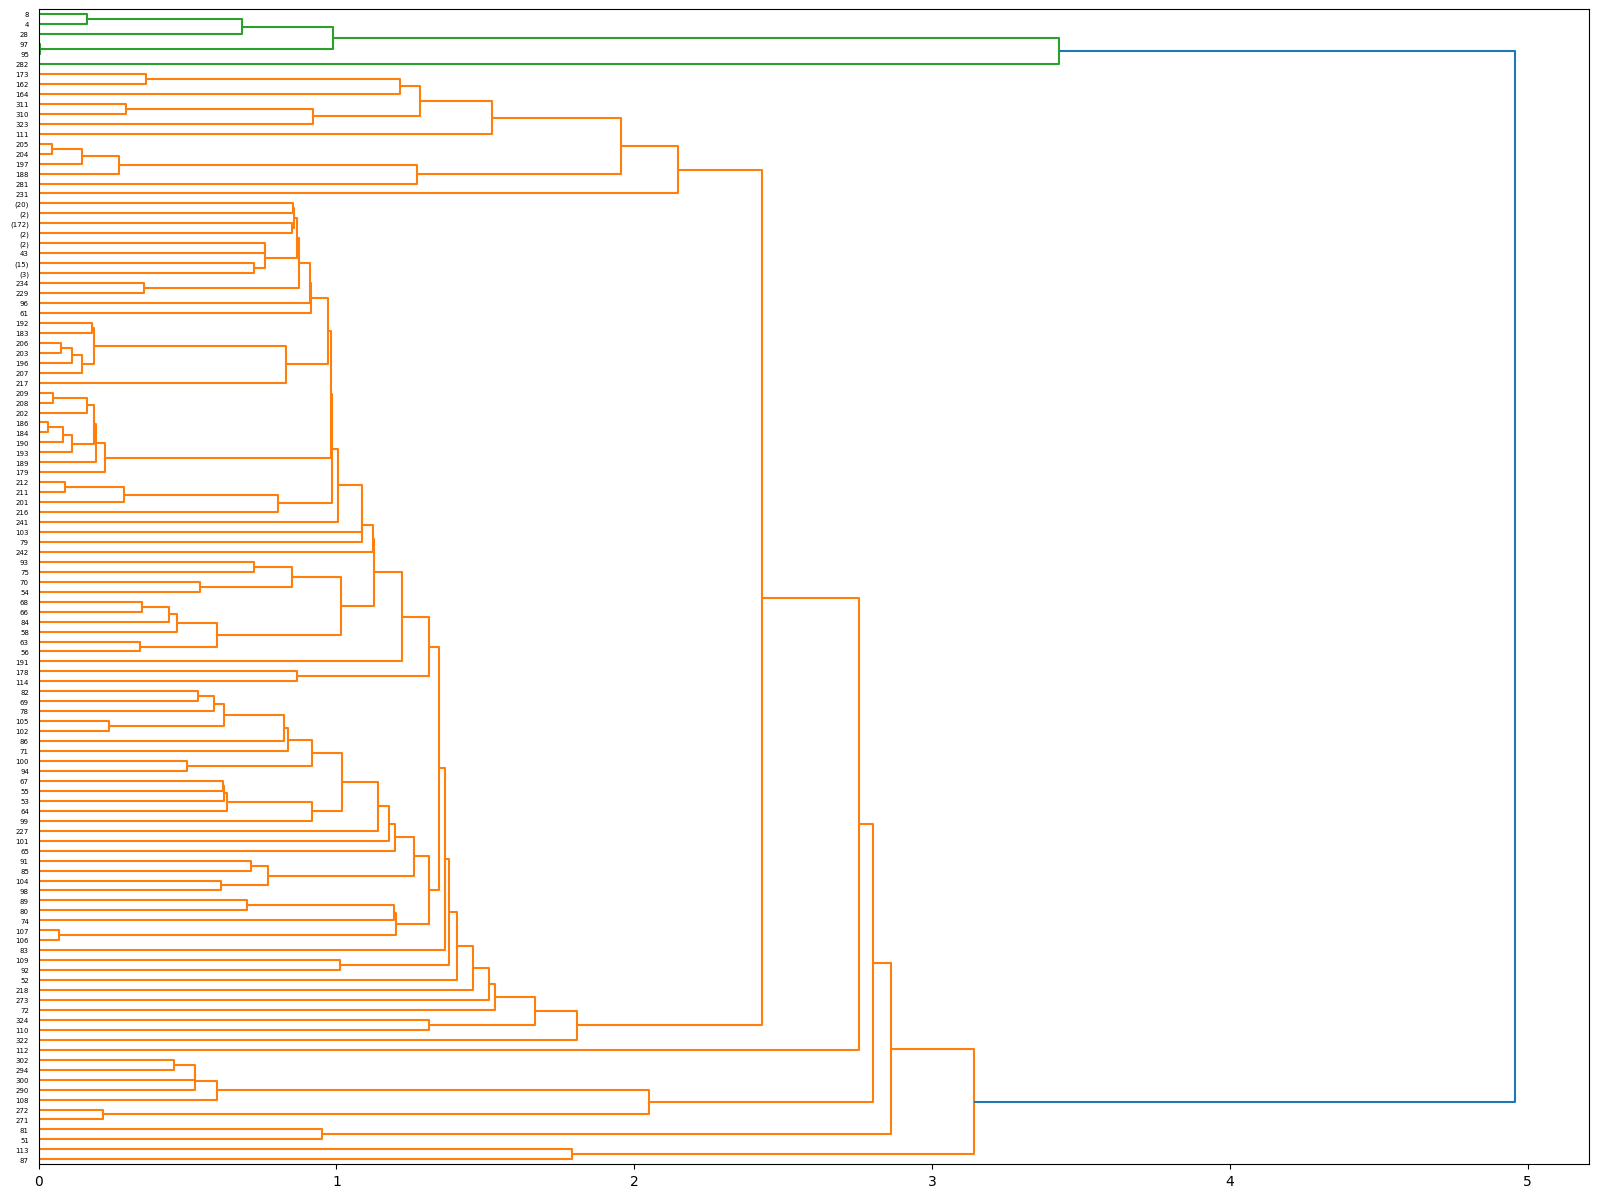

In [245]:
# Membuat dendrogram dengan pendekatan single linkage
cl_mergings_single = linkage(scores_pca_cleaned, method='single', metric='euclidean')

# Menggambar dendrogram
plt.figure(figsize=(20, 15))  # Ukuran gambar disesuaikan dengan kebutuhan
dendrogram(cl_mergings_single, orientation='right', truncate_mode='level')

# Menampilkan plot
plt.show()

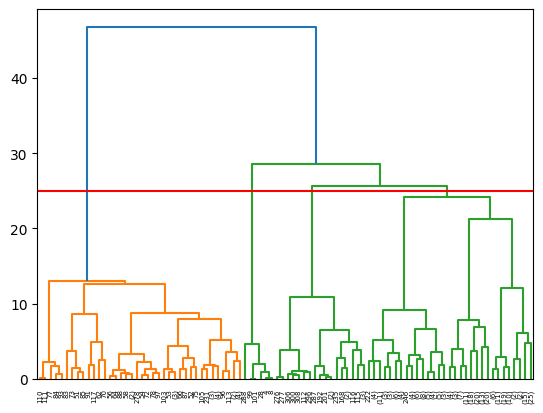

In [246]:
cl_mergings = linkage(scores_pca, method='ward', metric="euclidean")

# Menggambar dendrogram
dendrogram(cl_mergings, truncate_mode='level', p = 7)

# Menambahkan garis horizontal untuk tingkat pemotongan
plt.axhline(y=25, color='r', linestyle='-')

# Menampilkan plot
plt.show()

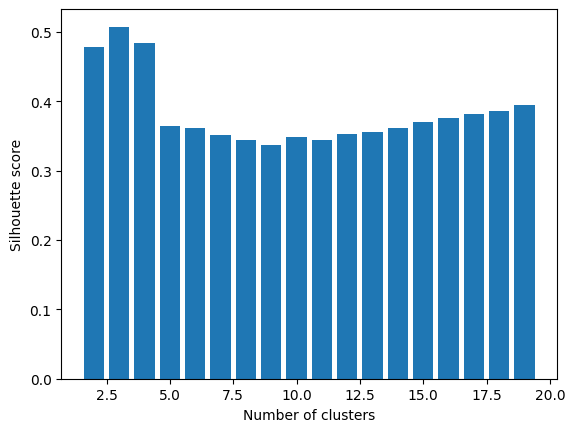

In [247]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2, 20):
    silhouette_scores.append(silhouette_score(scores_pca_cleaned, AgglomerativeClustering(n_clusters=n_cluster).fit_predict(scores_pca_cleaned)))

plt.bar(range(2, 20), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [248]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(scores_pca_cleaned)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1,
       0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3,

In [249]:
dt2 = df.copy()
df_clust_pca = pd.concat([dt2, pd.DataFrame(scores_pca_cleaned)], axis = 1)
df_clust_pca.columns.values[-5:] = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]
df_clust_pca

area_name property_id  property_name  property_type  unit_type  bedroom  \
0           14      PR0837             37              0          2      1.0   
1            7      PR0791             57              0         70      1.0   
2            7      PR0791             57              0         54      1.0   
3           19      PR0809             53              0         74      1.0   
4            1      PR0650             51              0         46      1.0   
..         ...         ...            ...            ...        ...      ...   
326         10      PR0554             87              3         63      1.0   
327         10      PR0554             87              3         63      1.0   
328         10      PR0554             87              3         76      1.0   
329          0      PR0088             93              4        103      1.0   
330          6      PR0778             72              4         93      2.0   

     bathroom  beds  wifi   tv  ...  breakfast  building_staff  \
0         1.0   1.0   1.0  1.0  ...        0.0             1.0   
1         1.0   1.0   1.0  1.0  ...        0.0             1.0   
2         1.0   1.0   1.0  1.0  ...        0.0             1.0   
3         1.0   1.0   1.0  1.0  ...        0.0             1.0   
4         1.0   1.0   0.0  1.0  ...        0.0             0.0   
..        ...   ...   ...  ...  ...        ...             ...   
326       1.0   1.0   1.0  0.0  ...        0.0             0.0   
327       1.0   1.0   1.0  0.0  ...        0.0             0.0   
328       1.0   1.0   1.0  0.0  ...        0.0             0.0   
329       1.0   1.0   1.0  0.0  ...        0.0             0.0   
330       2.0   2.0   1.0  0.0  ...        0.0             0.0   

     price_per_unit  total_bookings  overall_rating      PCA1      PCA2  \
0     681100.606557            18.0        4.968254 -0.572948 -1.472426   
1     510088.308000            36.0        4.955357 -0.729859 -1.312877   
2     753316.335052            30.0        4.946429 -0.592946 -1.303442   
3     763066.500000            39.0        4.937500 -0.480122 -1.550474   
4     377354.364251            50.0        4.935065 -1.076811  6.022809   
..              ...             ...             ...       ...       ...   
326   585261.670938            92.0        4.305419       NaN       NaN   
327   798408.018258           168.0        4.252492       NaN       NaN   
328   927270.298077            54.0        3.619048       NaN       NaN   
329   744056.045161            43.0        4.571429       NaN       NaN   
330   894656.811715            59.0        4.297143       NaN       NaN   

         PCA3      PCA4      PCA5  
0   -0.332118  1.545644  0.762457  
1   -0.723656  1.463170  0.662294  
2   -0.694653  1.423978  0.658341  
3    0.018105  1.541118  0.792416  
4   -1.903386  5.591352 -2.088655  
..        ...       ...       ...  
326       NaN       NaN       NaN  
327       NaN       NaN       NaN  
328       NaN       NaN       NaN  
329       NaN       NaN       NaN  
330       NaN       NaN       NaN  

[331 rows x 23 columns]

In [250]:
df_clust_pca = df_clust_pca.dropna(subset=['PCA4'])

In [251]:
df_clust_pca['cluster'] = pd.DataFrame(y_hc)
df_clust_pca


# Display value counts of each segment
print('----')
print(df_clust_pca['cluster'].value_counts())

----
cluster
0    252
1     46
3     21
2      6
Name: count, dtype: int64


<ipython-input-251-cbe8c3f67401>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust_pca['cluster'] = pd.DataFrame(y_hc)


In [252]:
df_clust_pca1 = df_clust_pca.iloc[ :, -6:-1]
df_clust_pca1

PCA1      PCA2      PCA3      PCA4      PCA5
0   -0.572948 -1.472426 -0.332118  1.545644  0.762457
1   -0.729859 -1.312877 -0.723656  1.463170  0.662294
2   -0.592946 -1.303442 -0.694653  1.423978  0.658341
3   -0.480122 -1.550474  0.018105  1.541118  0.792416
4   -1.076811  6.022809 -1.903386  5.591352 -2.088655
..        ...       ...       ...       ...       ...
320 -0.597950  1.127515  0.411347 -1.443427 -1.103181
321 -0.474306  1.176570  0.518765 -1.553859 -1.152617
322 -0.350691  1.750112  1.677202 -2.635247 -1.795540
323 -0.231794  2.532593 -0.483228 -2.112925  1.796912
324  1.555988  1.288103  0.061189 -1.757366 -1.355900

[325 rows x 5 columns]

In [253]:
df_clust_pca1['cluster'] = df_clust_pca['cluster'].astype('category')
df_clust_pca1 = df_clust_pca1.sort_values('cluster')
df_clust_pca1

<ipython-input-253-c241dc960335>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust_pca1['cluster'] = df_clust_pca['cluster'].astype('category')


PCA1      PCA2      PCA3      PCA4      PCA5 cluster
0   -0.572948 -1.472426 -0.332118  1.545644  0.762457       0
213 -0.852830 -0.485627  2.613701  0.151845 -0.587234       0
212 -0.788778  0.062588  2.666482  0.779133  0.072092       0
211 -0.807518  0.036013  2.611847  0.831303  0.101242       0
210 -0.854465 -0.541618  2.501379  0.255759 -0.523957       0
..        ...       ...       ...       ...       ...     ...
272 -0.376020  3.923234  0.028593  0.242529  4.086906       3
231  0.697007  0.309027 -0.014237 -1.080468  3.255670       3
281 -1.318252  1.706794  1.939127 -1.221419  2.447288       3
311 -0.810515  2.614290  0.148084 -2.707359  1.585766       3
162 -0.966216  0.949159  0.108539 -1.808223  2.315028       3

[325 rows x 6 columns]

In [254]:
replacement = {0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4"}  # Ubah sesuai kebutuhan
df_clust_pca1['cluster'] = df_clust_pca1['cluster'].replace(replacement)
df_clust_pca1

PCA1      PCA2      PCA3      PCA4      PCA5    cluster
0   -0.572948 -1.472426 -0.332118  1.545644  0.762457  Cluster 1
213 -0.852830 -0.485627  2.613701  0.151845 -0.587234  Cluster 1
212 -0.788778  0.062588  2.666482  0.779133  0.072092  Cluster 1
211 -0.807518  0.036013  2.611847  0.831303  0.101242  Cluster 1
210 -0.854465 -0.541618  2.501379  0.255759 -0.523957  Cluster 1
..        ...       ...       ...       ...       ...        ...
272 -0.376020  3.923234  0.028593  0.242529  4.086906  Cluster 4
231  0.697007  0.309027 -0.014237 -1.080468  3.255670  Cluster 4
281 -1.318252  1.706794  1.939127 -1.221419  2.447288  Cluster 4
311 -0.810515  2.614290  0.148084 -2.707359  1.585766  Cluster 4
162 -0.966216  0.949159  0.108539 -1.808223  2.315028  Cluster 4

[325 rows x 6 columns]

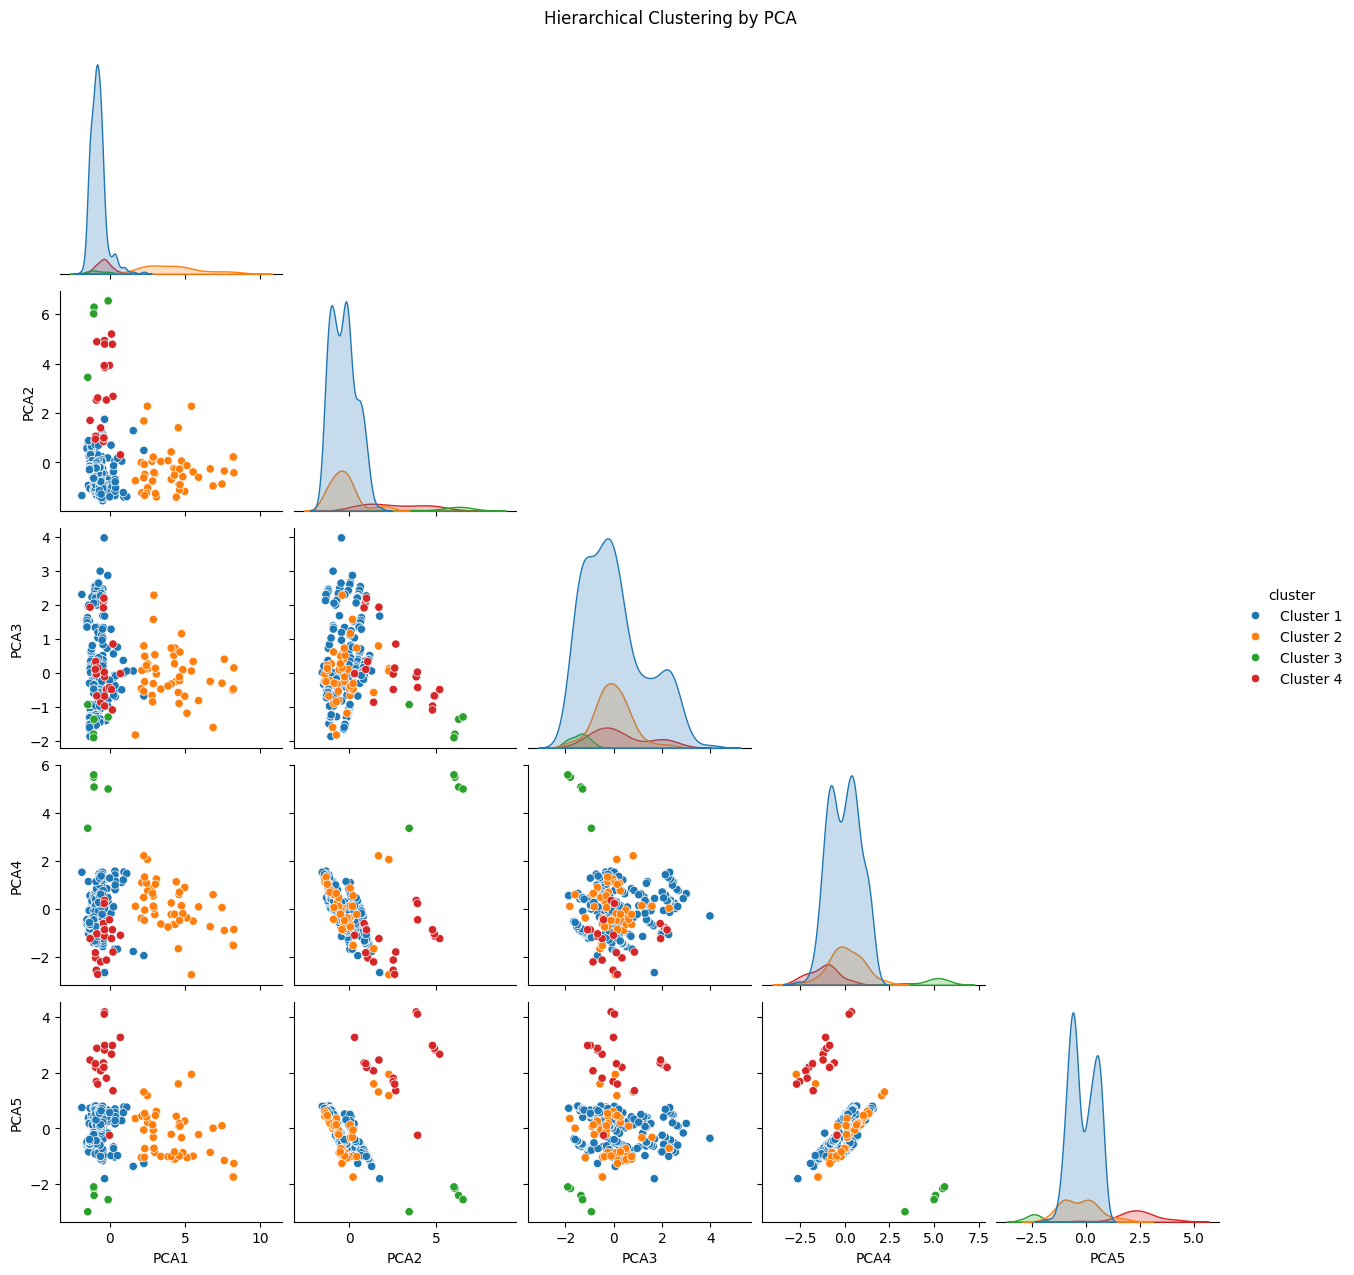

In [255]:
pairplot = sns.pairplot(df_clust_pca1, hue='cluster', corner=True)
pairplot.fig.suptitle('Hierarchical Clustering by PCA', y=1.02)
plt.show()

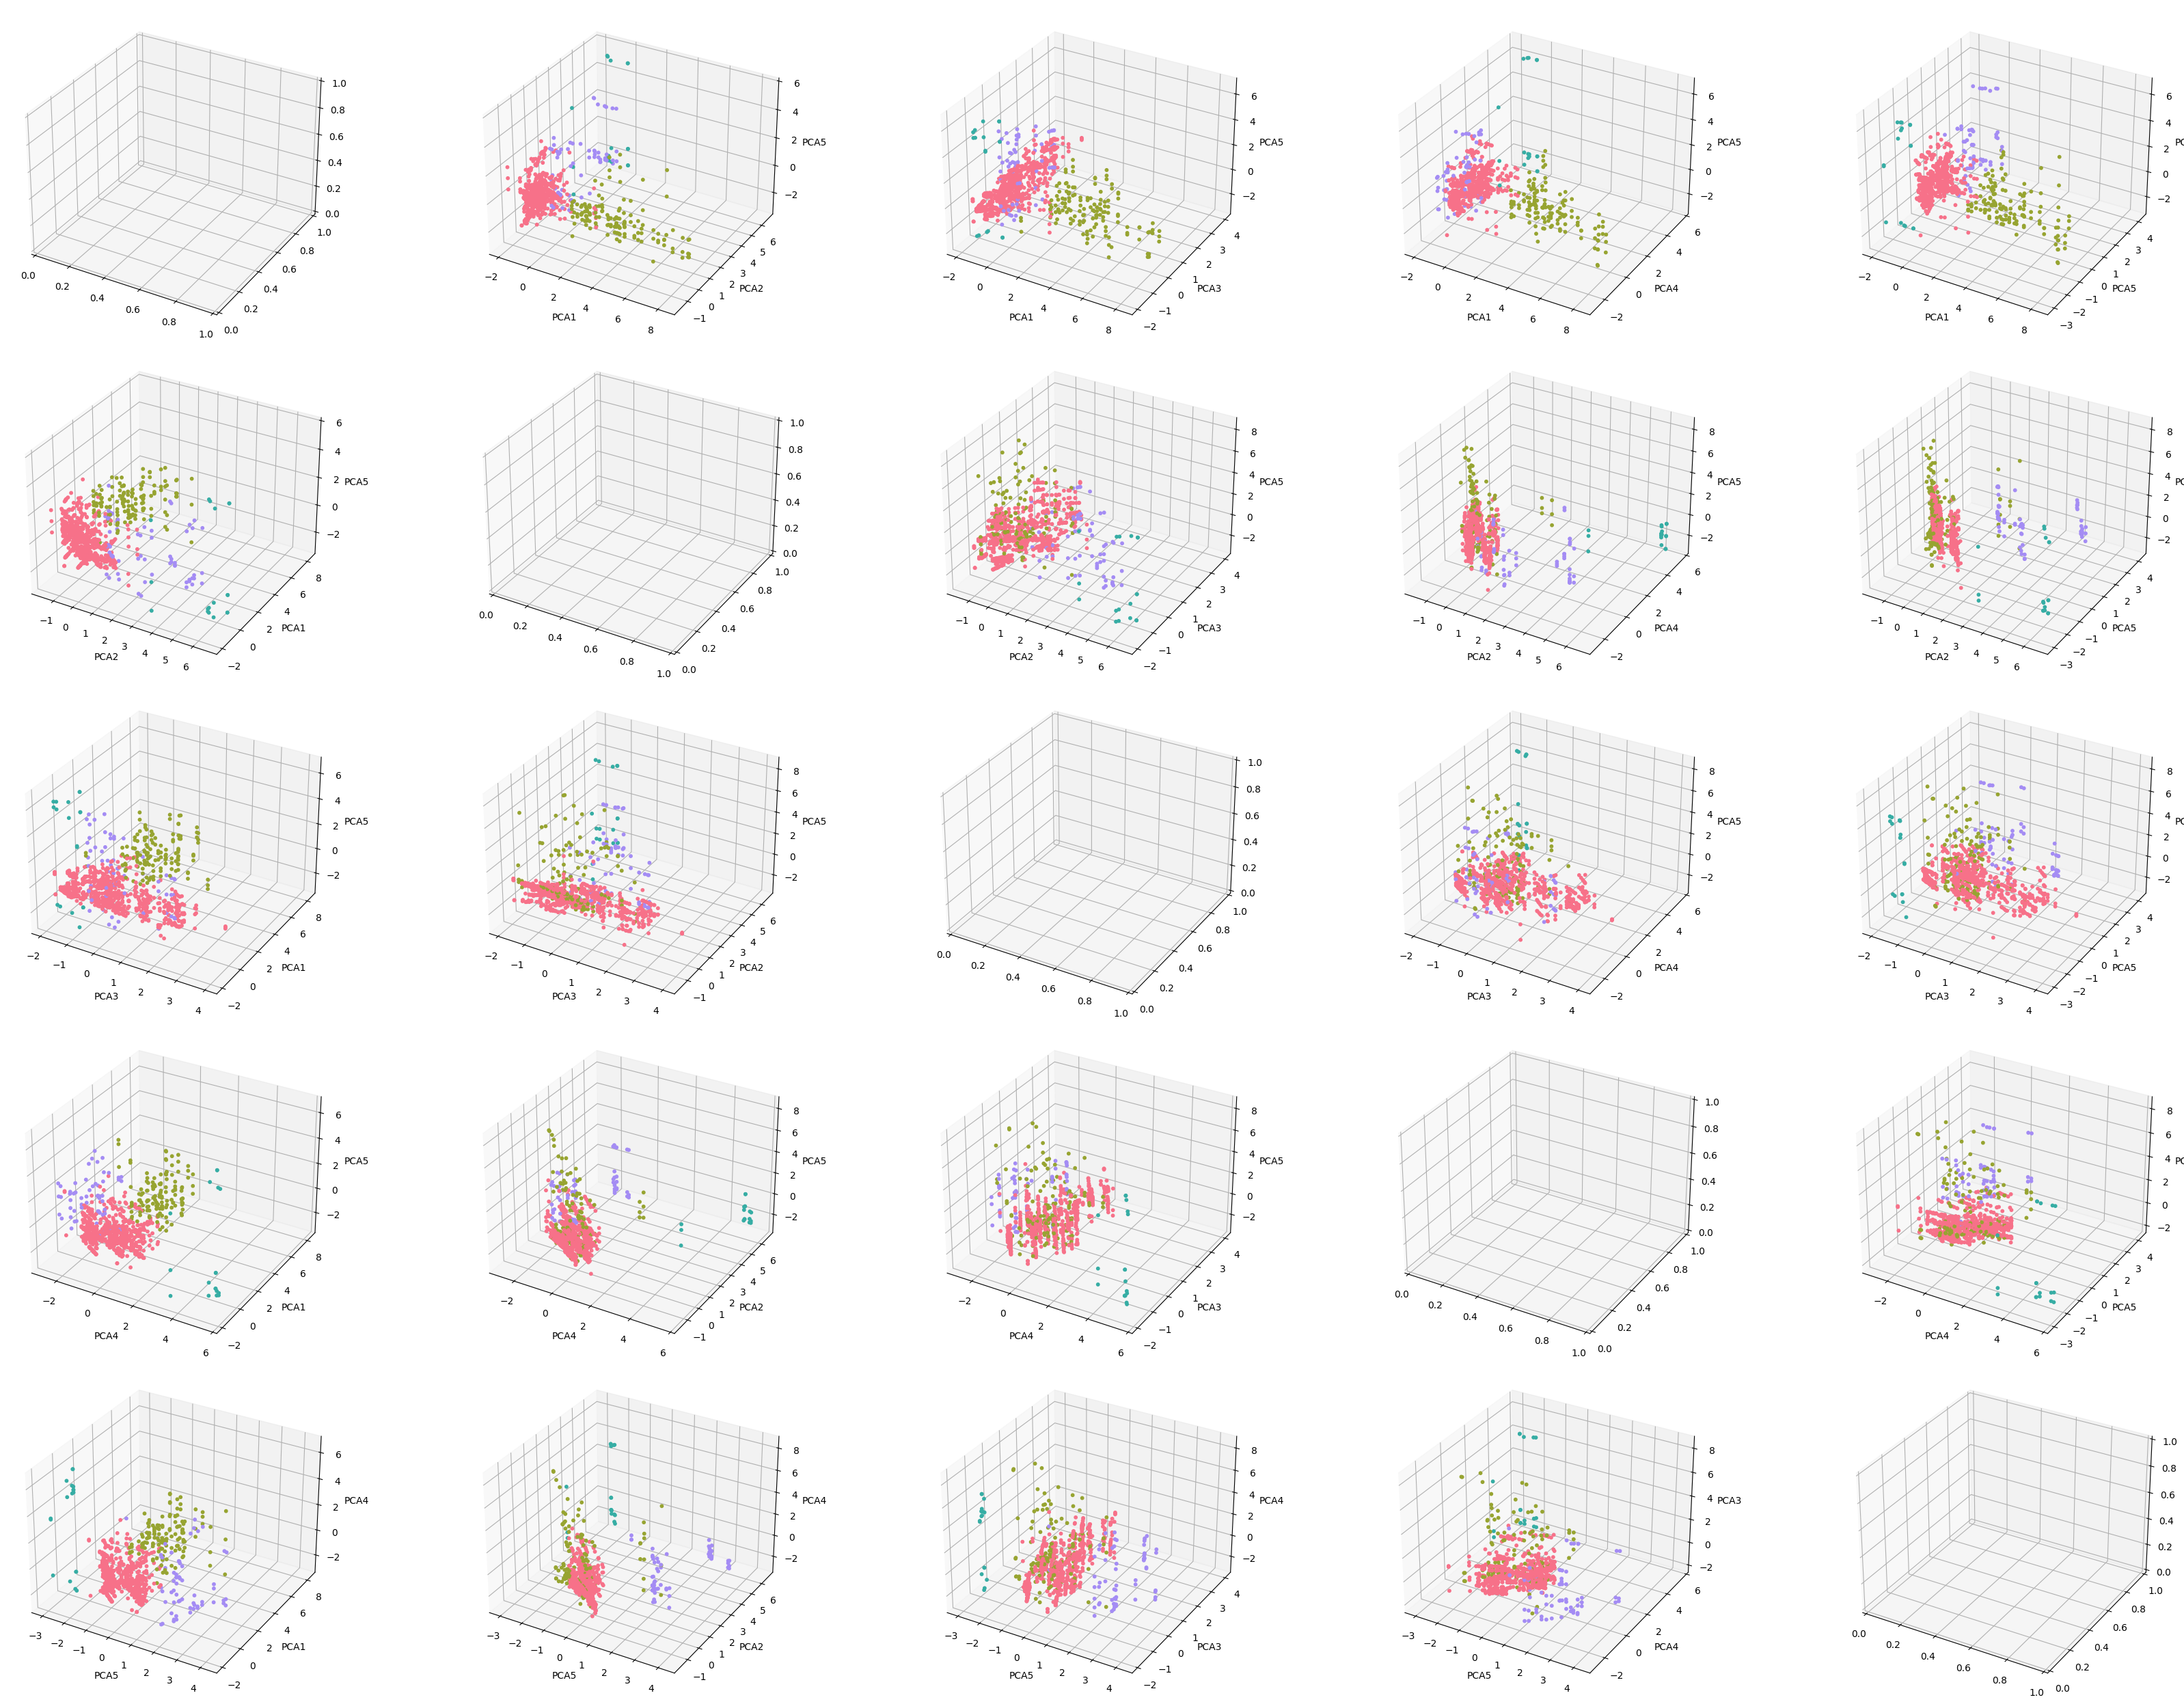

In [265]:
from matplotlib.colors import ListedColormap

comp = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]
x_cols = comp[:5]
y_cols = comp[:5]
z_cols = comp[:5]

c = df_clust_pca['cluster']

fig, axs = plt.subplots(5,5, figsize=(35, 25), subplot_kw={'projection': '3d'})

# Define color map
cmap = ListedColormap(sns.color_palette("husl", n_colors=len(df_clust_pca['cluster'].unique())).as_hex())

for i, x_col in enumerate(x_cols):
    for j, y_col in enumerate(y_cols):
        for k, z_col in enumerate(z_cols):
          if x_col != y_col and y_col != z_col and x_col != z_col:
            ax = axs[i, j]
            x = df_clust_pca[x_col]
            y = df_clust_pca[y_col]
            z = df_clust_pca[z_col]
            sc = ax.scatter(x, y, z, s=40, c=c, marker='.', cmap=cmap, alpha=1)
            ax.set_xlabel(x.name)
            ax.set_ylabel(y.name)
            ax.set_zlabel(z.name)

# Add color bar
# fig.colorbar(sc, ax=axs, shrink=0.6, ticks=df_clust_pca_kmeans['segment'].unique())

# Adjust layout
plt.tight_layout()

# save
plt.savefig("scatter_hue", bbox_inches='tight')

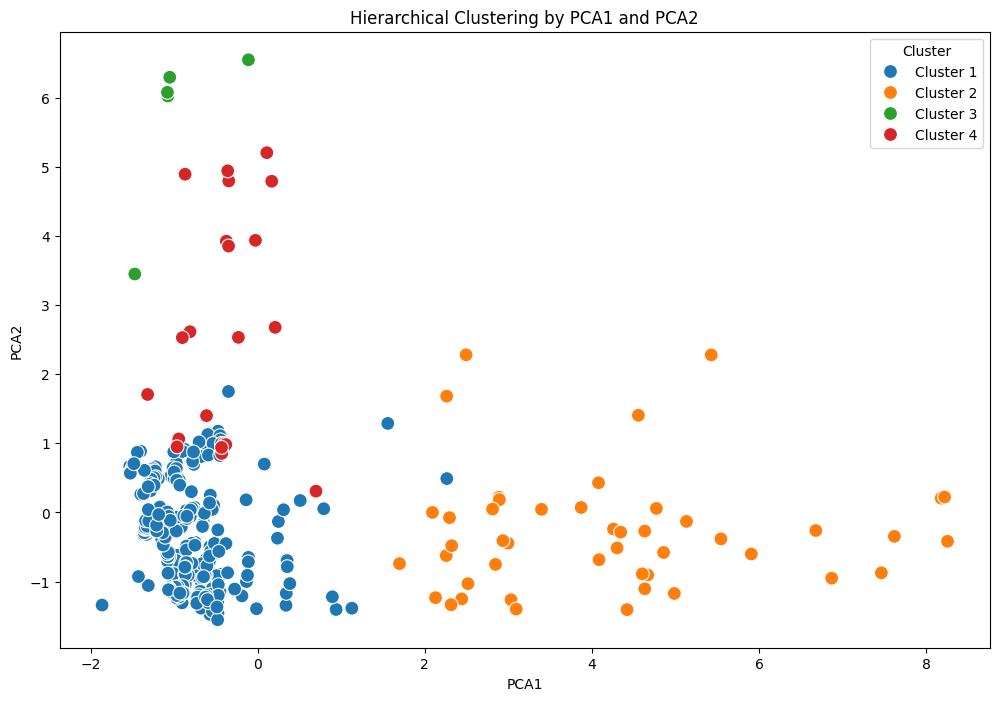

In [258]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clust_pca1.sort_values('cluster'), x='PCA1', y='PCA2', hue='cluster', s=100)  # Increase marker size to 100
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Hierarchical Clustering by PCA1 and PCA2')
plt.legend(title='Cluster')
plt.show()

In [259]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = pd.DataFrame(df2_scaled)
X = X.drop(index=range(331, 321))
X = X.rename(columns=dict(zip(X.columns, df2.columns)))
X

area_name  property_type   bedroom  bathroom      beds      wifi  \
0     0.624784      -0.672334 -0.388019 -0.371231 -0.415449  0.135873   
1    -0.304372      -0.672334 -0.388019 -0.371231 -0.415449  0.135873   
2    -0.304372      -0.672334 -0.388019 -0.371231 -0.415449  0.135873   
3     1.288466      -0.672334 -0.388019 -0.371231 -0.415449  0.135873   
4    -1.100790      -0.672334 -0.388019 -0.371231 -0.415449 -7.359801   
..         ...            ...       ...       ...       ...       ...   
326   0.093838       1.103271 -0.388019 -0.371231 -0.415449  0.135873   
327   0.093838       1.103271 -0.388019 -0.371231 -0.415449  0.135873   
328   0.093838       1.103271 -0.388019 -0.371231 -0.415449  0.135873   
329  -1.233527       1.695140 -0.388019 -0.371231 -0.415449  0.135873   
330  -0.437108       1.695140  0.978304  0.799031  0.906797  0.135873   

           tv        ac   parking      pool  breakfast  building_staff  \
0    1.072078  0.239808  0.279600  0.667394  -0.460928        1.065591   
1    1.072078  0.239808  0.279600  0.667394  -0.460928        1.065591   
2    1.072078  0.239808  0.279600  0.667394  -0.460928        1.065591   
3    1.072078  0.239808  0.279600  0.667394  -0.460928        1.065591   
4    1.072078 -4.169999  0.279600 -1.498365  -0.460928       -0.938446   
..        ...       ...       ...       ...        ...             ...   
326 -0.932768  0.239808  0.279600 -1.498365  -0.460928       -0.938446   
327 -0.932768  0.239808  0.279600 -1.498365  -0.460928       -0.938446   
328 -0.932768  0.239808  0.279600 -1.498365  -0.460928       -0.938446   
329 -0.932768  0.239808 -3.576544 -1.498365  -0.460928       -0.938446   
330 -0.932768  0.239808  0.279600 -1.498365  -0.460928       -0.938446   

     price_per_unit  overall_rating  
0         -0.317019        1.536201  
1         -0.564668        1.475190  
2         -0.212441        1.432953  
3         -0.198321        1.390715  
4         -0.756885        1.379196  
..              ...             ...  
326       -0.455807       -1.599424  
327       -0.147142       -1.849802  
328        0.039468       -4.846388  
329       -0.225851       -0.341031  
330       -0.007761       -1.638574  

[331 rows x 14 columns]

In [260]:
clusters = df_clust_pca['cluster']
clusters

0      0
1      0
2      0
3      0
4      2
      ..
320    0
321    0
322    0
323    3
324    0
Name: cluster, Length: 325, dtype: int64

## Evaluation Metric

In [261]:
from tabulate import tabulate
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs

def dunn_index(data, labels, metric='euclidean'):
    # Hitung jarak antara pusat cluster dengan metrik yang diberikan
    centroids = []
    for label in np.unique(labels):
        cluster_points = data[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)

    # Hitung jarak intra-cluster minimum
    min_intra_cluster_distance = np.inf
    for i in range(len(centroids)):
        for j in range(i+1, len(centroids)):
            distance = pairwise_distances([centroids[i]], [centroids[j]], metric=metric)[0][0]
            if distance < min_intra_cluster_distance:
                min_intra_cluster_distance = distance

    # Hitung jarak inter-cluster maksimum
    max_inter_cluster_distance = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        distance = pairwise_distances(cluster_points, [centroids[i]], metric=metric)[0][0]
        if distance > max_inter_cluster_distance:
            max_inter_cluster_distance = distance

    # Dunn Index adalah rasio antara jarak intra-cluster minimum dan jarak inter-cluster maksimum
    dunn_index = min_intra_cluster_distance / max_inter_cluster_distance
    return dunn_index

def partition_index(X, labels):
    n = len(labels)
    centroids = [np.mean(X[labels == label], axis=0) for label in np.unique(labels)]
    centroid_distances = pairwise_distances(centroids)
    partition_index = 0
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            partition_index += np.linalg.norm(centroids[i] - centroids[j]) / np.max(centroid_distances)
    partition_index *= 2 / (n * (n - 1))
    return partition_index

# If lengths are different, find the mismatch
if len(X) != len(clusters):
    # Identify indices that are missing in clusters
    common_indices = X.index.intersection(clusters.index)
    print(f"Number of common indices: {len(common_indices)}")

    # Filter X and clusters to only include common indices
    X_aligned = X.loc[common_indices]
    clusters_aligned = clusters.loc[common_indices]

    print(f"Length of X_aligned: {len(X_aligned)}")
    print(f"Length of clusters_aligned: {len(clusters_aligned)}")
else:
    X_aligned = X
    clusters_aligned = clusters

# Calculate the metrics using the aligned data
sil_score = silhouette_score(X_aligned, clusters_aligned)
calinski_score = calinski_harabasz_score(X_aligned, clusters_aligned)
davies_score = davies_bouldin_score(X_aligned, clusters_aligned)
dunn_score = dunn_index(X_aligned, clusters_aligned)
partition_score = partition_index(X_aligned, clusters_aligned)

# Prepare the table data
table_data = [
    ["Number of Observations", len(X_aligned)],
    ["Silhouette Score", sil_score],
    ["Davies Bouldin Score", davies_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Partition_score", partition_score],
    ["Dunn Index", dunn_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))


Number of common indices: 325
Length of X_aligned: 325
Length of clusters_aligned: 325
+-------------------------+-----------------------+
|         Metric          |         Value         |
+-------------------------+-----------------------+
| Number of Observations  |          325          |
|    Silhouette Score     |  0.09838593862117567  |
|  Davies Bouldin Score   |  3.4780193665480534   |
| Calinski Harabasz Score |   20.81879235664486   |
|     Partition_score     | 8.891089687887604e-05 |
|       Dunn Index        |  0.2573020493617975   |
+-------------------------+-----------------------+


### Transpose PCA

In [262]:
pc = np.transpose(scores_pca_cleaned)

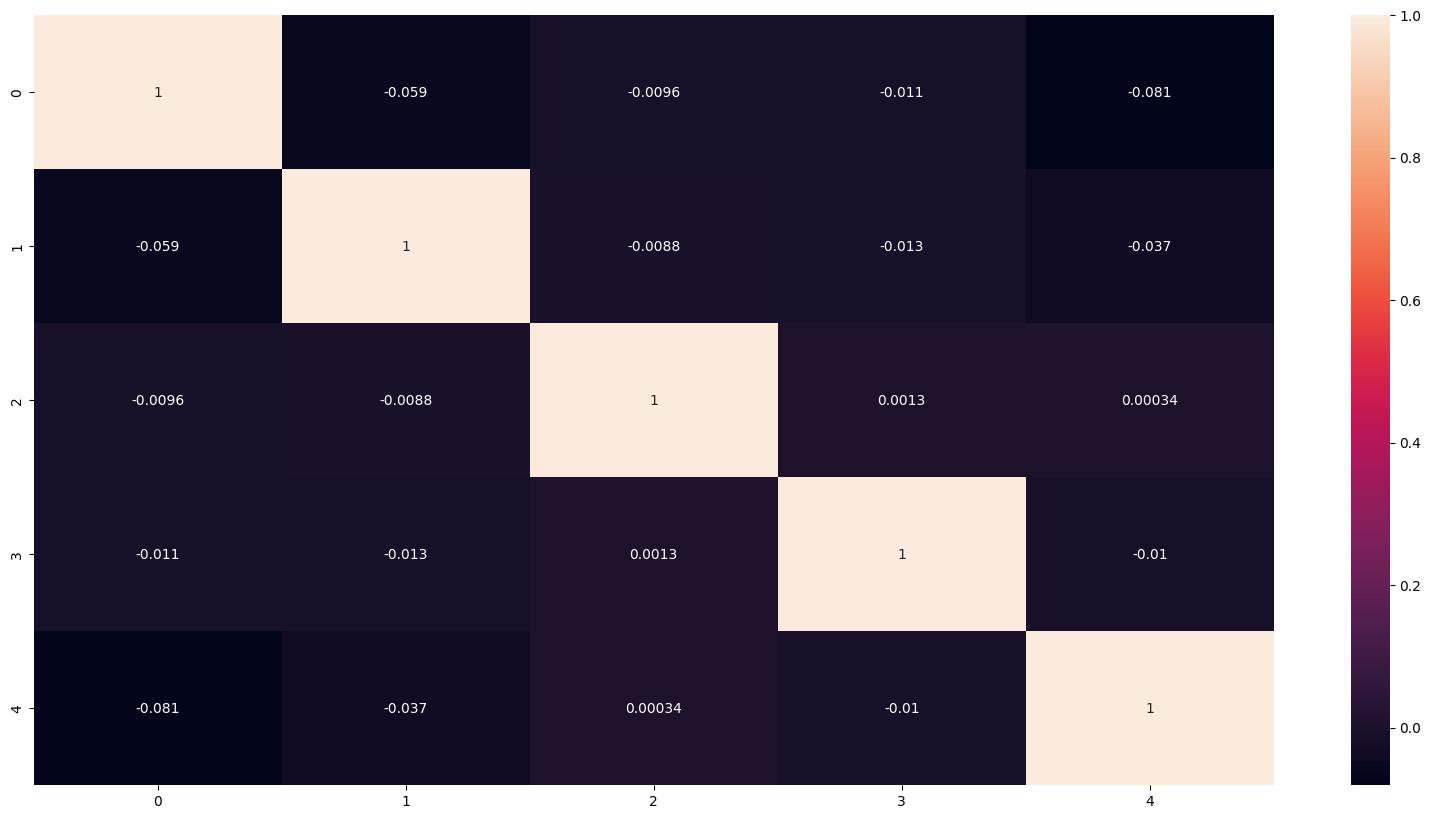

In [263]:
corrmat = np.corrcoef(pc)
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [264]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

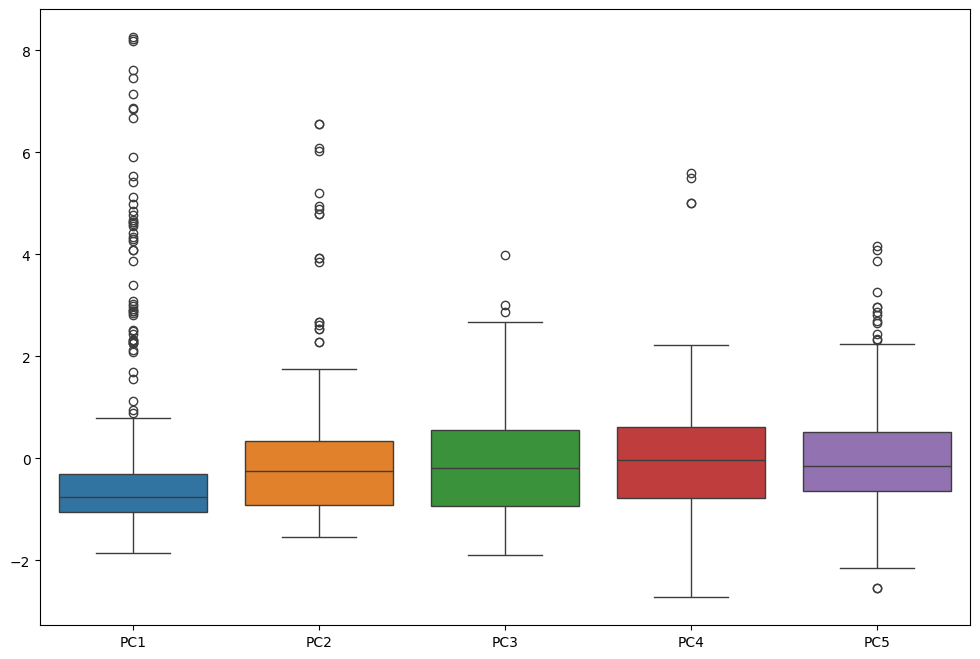

In [194]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

In [195]:
pcs_df2.shape

(327, 5)

In [196]:
pcs_df2.head()

PC1       PC2       PC3       PC4       PC5
0 -0.572948 -1.472426 -0.332118  1.545644  0.762457
1 -0.729859 -1.312877 -0.723656  1.463170  0.662294
2 -0.592946 -1.303442 -0.694653  1.423978  0.658341
3 -0.480122 -1.550474  0.018105  1.541118  0.792416
4 -1.076811  6.022809 -1.903386  5.591352 -2.088655

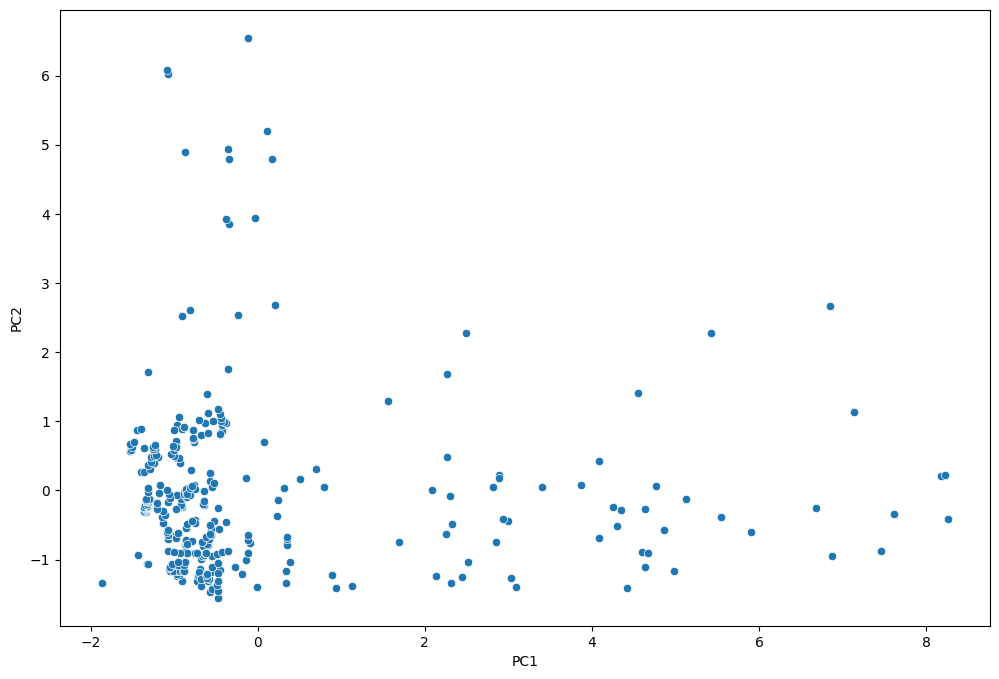

In [197]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()